In [1]:
%cd ~/NetBeansProjects/ExpLosion/
%load_ext autoreload
from notebooks.common_imports import *
from gui.output_utils import *

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [2]:
s = {'document_features_ev': 'AN+NN',
     'document_features_tr': 'J+N+AN+NN',
     'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
     'expansions__entries_of_id': None,
     'expansions__k': 3,
     'expansions__neighbour_strategy': 'linear',
     'expansions__noise': 0.0,
     'expansions__use_random_neighbours': 0,
     'expansions__use_similarity': 0,
     'expansions__vectors__algorithm': 'word2vec',
#      'expansions__vectors__composer': 'Add',
     'expansions__vectors__dimensionality': 100,
     'expansions__vectors__rep': 0,
     'expansions__vectors__unlabelled': 'wiki',
     'expansions__vectors__unlabelled_percentage__in': [100],
     'labelled': 'amazon_grouped-tagged'}
ids = Experiment.objects.filter(**s).values_list('id', flat=True)
fields = {'unlab': 'expansions__vectors__unlabelled',
            'percent': 'expansions__vectors__unlabelled_percentage',
            'Composer': 'expansions__vectors__composer',
            'Overlap': 'expansions__allow_overlap'}
print('ids are', ids, 'total', len(ids))
df = dataframe_from_exp_ids(ids, fields)
df['corpus'] = ['%s-%s'%(a,b) for a,b in zip(df.unlab, df.percent)]
df.Overlap = df.Overlap.map({'1': 'Allowed', '0': 'Not allowed'})

ids are [34, 35, 36, 37, 209, 212, 215, 218] total 8
Calculating CI for exp 209
Calculating CI for exp 212
Calculating CI for exp 215
Calculating CI for exp 218
Overlap has 4000 values
Accuracy has 4000 values
percent has 4000 values
unlab has 4000 values
Composer has 4000 values
folds has 4000 values


/home/m/mm/mmb28/anaconda3/lib/python3.4/site-packages/seaborn/categorical.py:2653: UserWarning: The `x_order` parameter has been renamed `order`
  UserWarning)

  UserWarning)



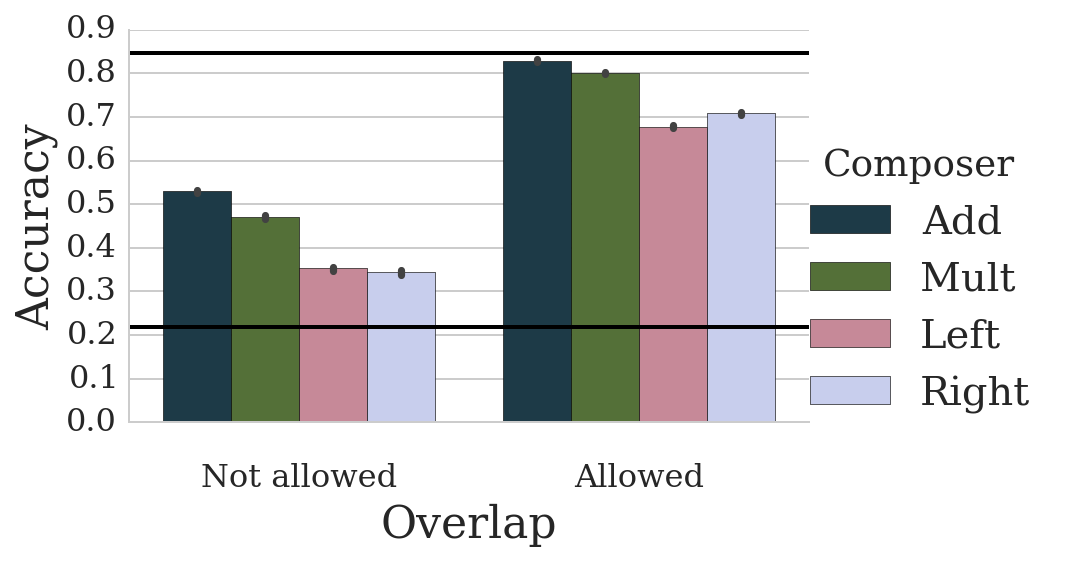

In [3]:
sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap
with sns.color_palette("cubehelix", 4):
    g = sns.factorplot(y='Accuracy', hue='Composer', x='Overlap', 
                       x_order=['Not allowed', 'Allowed'], 
                       data=df, kind='bar', ci=68, aspect=1.5);
for ax in g.axes.flat:
    ax.axhline(random_vect_baseline(), c='k');
    ax.axhline(nondistributional_baseline(**settings_of(ids[0])), c='k');
g.savefig('plot-nps-with-lexical-overlap.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [4]:
df.groupby(['Overlap', 'Composer']).mean()

Accuracy  folds
Overlap     Composer                 
Allowed     Add       0.829138  249.5
            Left      0.677532  249.5
            Mult      0.800669  249.5
            Right     0.708210  249.5
Not allowed Add       0.529272  249.5
            Left      0.352832  249.5
            Mult      0.470885  249.5
            Right     0.343581  249.5